<a href="https://colab.research.google.com/github/tomonari-masada/courses/blob/master/SML2020/08_solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ケーススタディ： solubility data

Max Kuhn and Kjell Johnson. Applied Predictive Modeling. Springer, 2013. に出てくるデータセット (Section 6.1)

http://appliedpredictivemodeling.com/data

* 説明変数は下記の228個
 * Two hundred and eight binary “fingerprints” that indicate the presence or absence of a particular chemical substructure.
 * Sixteen count descriptors, such as the number of bonds or the number of bromine atoms.
 * Four continuous descriptors, such as molecular weight or surface area.

* 目的変数はlog solubility
 * 範囲は−11.6 to 1.6、平均は−2.7

### 連続値をとる20変数の様子をみる

* seabornで散布図を描く
* 縦軸は目的変数とする

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X = pd.read_csv('solTrainX.csv')
y = pd.read_csv('solTrainY.csv')['x']
X['solubility'] = y

In [0]:
continuous = [s for s in X.columns.to_list()
  if s[:3] == 'Num' or s[:3] == 'Hyd' or s[:3] == 'Mol' or s[:3] == 'Sur']

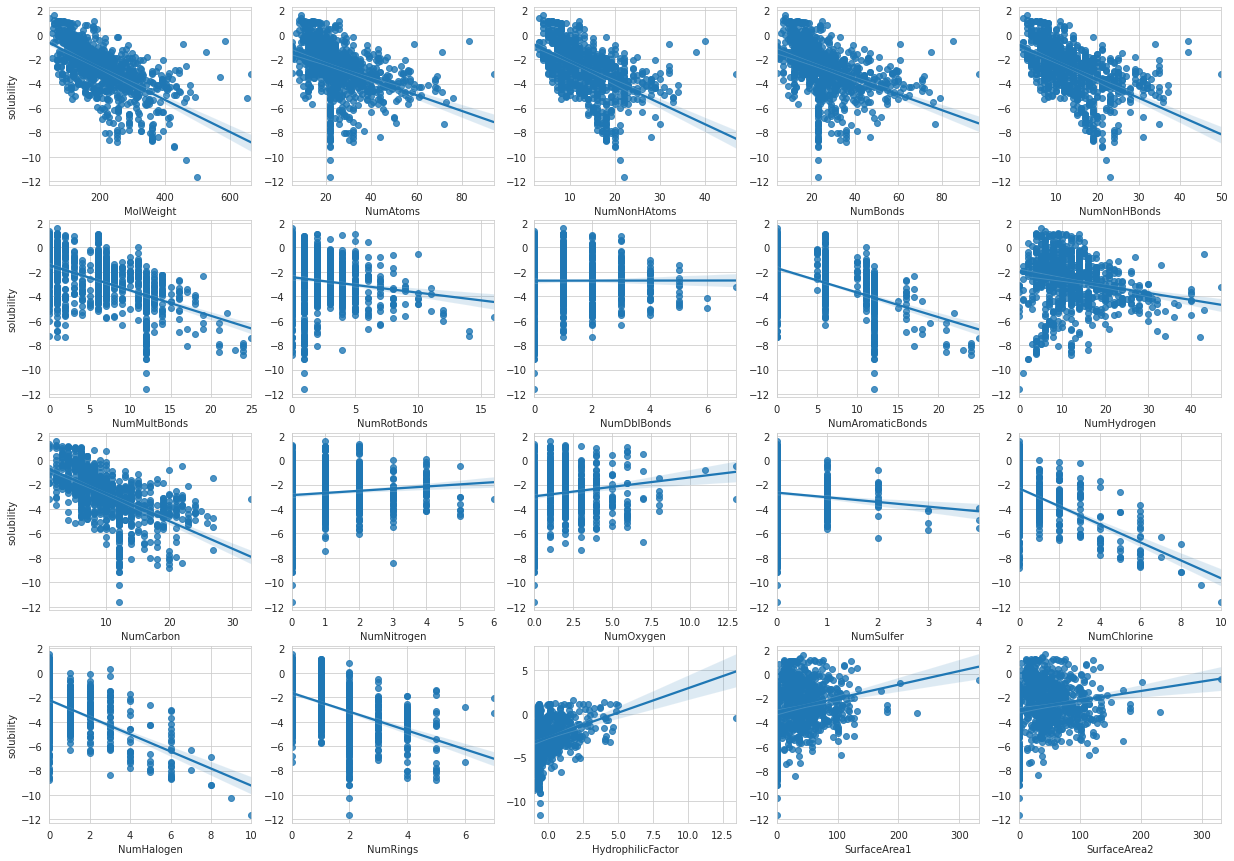

In [4]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21.0, 15.0))
for i in range(20):
  ax = fig.add_subplot(4, 5, i+1)
  sns.regplot(x=continuous[i], y='solubility', data=X, ax=ax)
  if i % 5 != 0: ax.set_ylabel('')

### ２値変数について主成分分析を使ってみる

* component数は仮に100とする

In [0]:
from sklearn.decomposition import PCA

In [0]:
X_binary = X.loc[:,X.columns.str.startswith('FP')]

In [7]:
X_binary.describe()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,FP011,FP012,FP013,FP014,FP015,FP016,FP017,FP018,FP019,FP020,FP021,FP022,FP023,FP024,FP025,FP026,FP027,FP028,FP029,FP030,FP031,FP032,FP033,FP034,FP035,FP036,FP037,FP038,FP039,FP040,...,FP169,FP170,FP171,FP172,FP173,FP174,FP175,FP176,FP177,FP178,FP179,FP180,FP181,FP182,FP183,FP184,FP185,FP186,FP187,FP188,FP189,FP190,FP191,FP192,FP193,FP194,FP195,FP196,FP197,FP198,FP199,FP200,FP201,FP202,FP203,FP204,FP205,FP206,FP207,FP208
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,...,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,0.493165,0.539432,0.436383,0.584648,0.579390,0.400631,0.363828,0.325973,0.279706,0.178759,0.214511,0.176656,0.166141,0.160883,0.860147,0.146162,0.144059,0.131441,0.121977,0.119874,0.120925,0.104101,0.123028,0.112513,0.115668,0.084122,0.097792,0.106204,0.101998,0.093586,0.089380,0.073607,0.069401,0.079916,0.072555,0.075710,0.070452,0.086225,0.074658,0.068349,...,0.186120,0.184017,0.169295,0.151420,0.141956,0.130389,0.134595,0.121977,0.120925,0.120925,0.097792,0.107256,0.093586,0.098843,0.075710,0.084122,0.085174,0.076761,0.072555,0.068349,0.076761,0.072555,0.070452,0.060988,0.062040,0.058885,0.060988,0.056782,0.052576,0.056782,0.047319,0.049422,0.052576,0.257624,0.114616,0.098843,0.077813,0.059937,0.056782,0.112513
std,0.500216,0.498705,0.496197,0.493042,0.493917,0.490284,0.481353,0.468984,0.449091,0.383352,0.410699,0.381578,0.372403,0.367617,0.347017,0.353454,0.351334,0.338059,0.327431,0.324985,0.326212,0.305552,0.328643,0.316163,0.319994,0.277717,0.297189,0.308261,0.302805,0.291405,0.285441,0.261267,0.254268,0.271306,0.259541,0.264672,0.256042,0.280844,0.262977,0.252477,...,0.389408,0.387702,0.375210,0.358646,0.349188,0.336908,0.341470,0.327431,0.326212,0.326212,0.297189,0.309601,0.291405,0.298609,0.264672,0.277717,0.279287,0.266352,0.259541,0.252477,0.266352,0.259541,0.256042,0.239435,0.241355,0.235534,0.239435,0.231548,0.223303,0.231548,0.212431,0.216861,0.223303,0.437556,0.318726,0.298609,0.268018,0.237495,0.231548,0.316163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [8]:
n_components = 100
pca = PCA(n_components=n_components)
pca.fit(X_binary)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

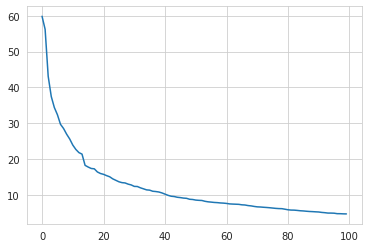

In [9]:
plt.plot(range(n_components), pca.singular_values_)

In [0]:
X_binary_embedded = pca.transform(X_binary)

In [11]:
X_binary_embedded[0]

array([ 1.45333496, -1.44179928, -1.07689363,  1.49383011,  1.09059605,
       -1.2084616 , -0.97270413, -0.05818352,  0.0108131 ,  1.50577481,
       -0.90135662, -0.93378086,  0.10708185, -0.77848073, -1.29601776,
        0.31001603,  0.00658403,  0.24079597,  0.15168476,  0.10151459,
        0.61776848,  0.38536504, -0.20071412,  0.58172766,  0.24626101,
       -0.33051248,  0.25534876,  0.30080921, -0.63316391,  0.08893792,
        0.35213329,  0.20502681,  0.20776836,  0.32264402,  0.2821496 ,
       -0.22847913, -0.11451076, -0.19692089,  0.18435061,  0.11094513,
        0.18498095,  0.35493502, -0.14973903,  0.76172455,  0.03960374,
        0.21530196, -0.35022837,  0.02127961, -0.08313267, -0.20149828,
       -0.06941235,  0.33798384,  0.26117162, -0.01781299,  0.4436972 ,
       -0.13414884, -0.28755614, -0.25525057,  0.05634348,  0.05208028,
       -0.42593595,  0.23301907, -0.3264452 , -0.22145761,  0.01177767,
       -0.13896358, -0.2701747 , -0.0303839 , -0.04903492,  0.16

In [0]:
X_embedded = np.concatenate([X_binary_embedded, X[continuous].to_numpy()], 1)

### ２値変数のインタラクションを考慮してみる

* その上で主成分分析を使う

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
poly.fit(X_binary)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

In [0]:
X_binary_poly = poly.transform(X_binary)

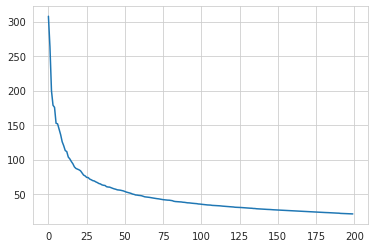

In [16]:
n_components = 200
pca = PCA(n_components=n_components)
pca.fit(X_binary_poly)
plt.plot(range(n_components), pca.singular_values_)